In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# TS dataset from https://www.ncdc.noaa.gov/cdo-web/
TS_FileName = "1955205.csv"
TS_df = pd.read_csv(TS_FileName)

In [3]:
TS_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,1996-04-01,NaN,NaN,22.7,"H,,S",NaN,NaN,NaN,NaN
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,1996-04-02,NaN,NaN,24.3,"H,,S",NaN,NaN,NaN,NaN
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,1996-04-03,NaN,NaN,27.3,"H,,S",NaN,NaN,NaN,NaN
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,1996-04-04,NaN,NaN,29.8,"H,,S",NaN,NaN,NaN,NaN
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,1996-04-05,NaN,NaN,30.5,"H,,S",NaN,NaN,NaN,NaN


In [4]:
TS_df.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
5611,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-12-27,NaN,NaN,14.4,"H,,S",24.4,",,S",5.8,",,S"
5612,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-12-28,NaN,NaN,13.2,"H,,S",23.4,",,S",5.6,",,S"
5613,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-12-29,NaN,NaN,13.9,"H,,S",25.1,",,S",6.0,",,S"
5614,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-12-30,NaN,NaN,14.6,"H,,S",20.0,",,S",6.2,",,S"
5615,IN022021900,"NEW DELHI SAFDARJUN, IN",28.583,77.2,216.0,2000-12-31,4.1,",,S",17.2,"H,,S",24.5,",,S",11.1,",,S"


In [5]:
# Checking for NaNs:
print( sum(TS_df["DATE"].isna()) )
print( sum(TS_df["TAVG"].isna()) )

0
0


There seem to be 2 latitude & longitude coordinates.

In [6]:
print("Two latitutde coods:", set(TS_df["LATITUDE"].values))
print("Two longitude coods:", set(TS_df["LONGITUDE"].values))

Two latitutde coods: {28.566999999999997, 28.583000000000002}
Two longitude coods: {77.2, 77.117}


This data file has temperature measurements from 2 measuring stations in Delhi: Palam and Safdarjung. Look at the column "NAME" to see which is which.

In [7]:
set(TS_df["STATION"]) #Measuring station IDs.

{'IN022021900', 'IN022023000'}

In [8]:
# Measuring station IDs:
TempStation_P = TS_df["STATION"].values[0] # Palam.
TempStation_S = TS_df["STATION"].values[-1] # Safdarjung.

In [9]:
# Measuring station names:
TempStation_P_Name = TS_df["NAME"].values[0] # Palam.
TempStation_S_Name = TS_df["NAME"].values[-1] # Safdarjung.

In [10]:
print(TempStation_P, TempStation_P_Name)
print(TempStation_S, TempStation_S_Name)

IN022023000 NEW DELHI PALAM, IN
IN022021900 NEW DELHI SAFDARJUN, IN


In [11]:
TS_P = TS_df.loc[TS_df["STATION"]==TempStation_P, "TAVG"]

TS_P_DateList = []
for ThisDate in TS_df.loc[TS_df["STATION"]==TempStation_P, "DATE"].values:
    TS_P_DateList.append(datetime.strptime(ThisDate, '%Y-%m-%d'))

In [12]:
len(TS_P), len(TS_P_DateList)

(1690, 1690)

In [13]:
TS_S = TS_df.loc[TS_df["STATION"]==TempStation_S, "TAVG"]

TS_S_DateList = []
for ThisDate in TS_df.loc[TS_df["STATION"]==TempStation_S, "DATE"].values:
    TS_S_DateList.append(datetime.strptime(ThisDate, '%Y-%m-%d'))

In [14]:
len(TS_S), len(TS_S_DateList)

(3926, 3926)

/Users/mc2/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


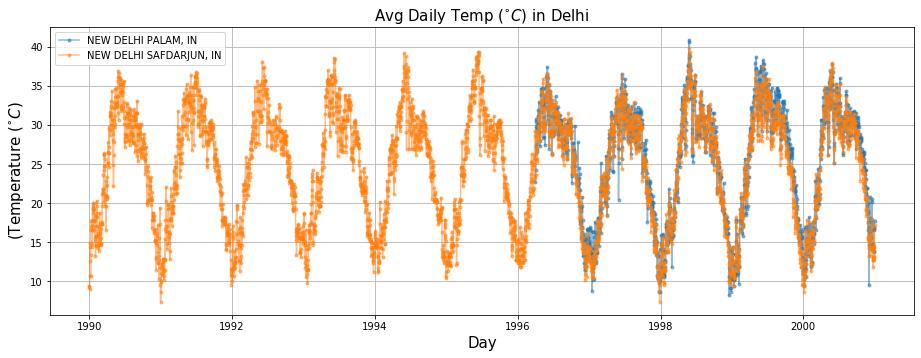

In [15]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])

ax.plot(TS_P_DateList, TS_P, ".-", alpha=0.5, label=TempStation_P_Name)
ax.plot(TS_S_DateList, TS_S, ".-", alpha=0.5, label=TempStation_S_Name)

ax.set_xlabel("Day", fontsize=15)
ax.set_ylabel("(Temperature ($^{\circ}C$)", fontsize=15)
ax.set_title("Avg Daily Temp ($^{\circ}C$) in Delhi", fontsize=15)

ax.grid(True)
ax.legend()
plt.show()

In [16]:
N_P = len(TS_P)
N_S = len(TS_S)
print("Length of TS from Palam =", N_P)
print("Length of TS from Safdarjung =", N_S)

Length of TS from Palam = 1690
Length of TS from Safdarjung = 3926


---

In [17]:
def CalculateAvgDev(TS):
    MySum = 0.0
    TS_mean = np.mean(TS)
    N_TS = len(TS)
    for x in TS:
        MySum += np.abs(x - TS_mean)
    TS_AvgDev = MySum/N_TS
    return(TS_AvgDev)

In [18]:
def CalcStatsTS(TS):
    N = len(TS)
    
    TS1 = TS_P[:int(N_P/2)] #first half of TS.
    TS2 = TS_P[int(N_P/2):] #second half of TS.
    #-----
    TS_std = np.std(TS, ddof=1)
    
    TS_StandardError = TS_std/np.sqrt(N)
    
    print("Standard error of TS =", TS_StandardError)
    print("---")
    #-----
    TS_mean = np.mean(TS)
    
    TS1_mean = np.mean(TS1)
    TS2_mean = np.mean(TS2)
    
    print("Mean of full TS =", TS_mean)
    print("Mean of first half of TS =", TS1_mean)
    print("Mean of second half of TS =", TS2_mean)
    
    print("Difference between means of two halves of TS = {}".\
          format(np.abs(TS1_mean - TS2_mean)))
    print("Difference between means of two halves of TS as multiples of standard error = {}".\
          format(np.abs(TS1_mean - TS2_mean)/TS_StandardError))
    print("---")
    #-----
    TS1_std = np.std(TS1, ddof=1)
    TS2_std = np.std(TS2, ddof=1)
    
    print("Standard deviation of full TS =", TS_std)
    print("Standard deviation of first half of TS =", TS1_std)
    print("Standard deviation of second half of TS =", TS2_std)
    
    print("Difference between standard deviations of two halves of TS = {}".format(np.abs(TS1_std - TS2_std)))
    print("Difference between standard deviations of two halves of TS as multiples of standard error = {}".\
          format(np.abs(TS1_std - TS2_std)/TS_StandardError))
    print("---")
    #-----
    TS_AvgDev = CalculateAvgDev(TS)
    
    TS1_AvgDev = CalculateAvgDev(TS1)
    TS2_AvgDev = CalculateAvgDev(TS2)
    
    print("Average deviation of full TS =", TS_AvgDev)
    print("Average deviation of first half of TS =", TS1_AvgDev)
    print("Average deviation of second half of TS =", TS2_AvgDev)
    
    print("Difference between avg deviations of two halves of TS = {}".format(np.abs(TS1_AvgDev - TS2_AvgDev)))
    print("Difference between avg deviations of two halves of TS as multiples of standard error = {}".\
          format(np.abs(TS1_AvgDev - TS2_AvgDev)/TS_StandardError))
    print("---")

---

Palam TS:

In [19]:
CalcStatsTS(TS_P)

Standard error of TS = 0.17911058384442516
---
Mean of full TS = 25.331538461538454
Mean of first half of TS = 25.351479289940844
Mean of second half of TS = 25.31159763313611
Difference between means of two halves of TS = 0.03988165680473443
Difference between means of two halves of TS as multiples of standard error = 0.22266499247959295
---
Standard deviation of full TS = 7.3631661738822345
Standard deviation of first half of TS = 7.244608278742616
Standard deviation of second half of TS = 7.48408472047932
Difference between standard deviations of two halves of TS = 0.2394764417367039
Difference between standard deviations of two halves of TS as multiples of standard error = 1.337031216115695
---
Average deviation of full TS = 6.372162039144293
Average deviation of first half of TS = 6.226286194460971
Average deviation of second half of TS = 6.517282728195804
Difference between avg deviations of two halves of TS = 0.29099653373483303
Difference between avg deviations of two halves of

---

Safdarjung TS:

In [20]:
CalcStatsTS(TS_S)

Standard error of TS = 0.11544162387485535
---
Mean of full TS = 24.57414671421303
Mean of first half of TS = 25.351479289940844
Mean of second half of TS = 25.31159763313611
Difference between means of two halves of TS = 0.03988165680473443
Difference between means of two halves of TS as multiples of standard error = 0.34547033787369624
---
Standard deviation of full TS = 7.233318271772809
Standard deviation of first half of TS = 7.244608278742616
Standard deviation of second half of TS = 7.48408472047932
Difference between standard deviations of two halves of TS = 0.2394764417367039
Difference between standard deviations of two halves of TS as multiples of standard error = 2.0744375702502995
---
Average deviation of full TS = 6.298875620268922
Average deviation of first half of TS = 6.226286194460971
Average deviation of second half of TS = 6.517282728195804
Difference between avg deviations of two halves of TS = 0.29099653373483303
Difference between avg deviations of two halves of 